In [286]:
%matplotlib notebook

In [287]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy import stats
import numpy as np
#descomponer las series de tiempo en sus componentes
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

file = "Data\Datos históricos S&P_BMV IPC (1).csv"

datos_IPC = pd.read_csv(file)
datos_IPC.head()

#fecha_grouped = datos_IPC.groupby("Fecha")
#fecha_grouped["time2"] = str(datos_IPC["Fecha"])
#fecha_grouped.head()

,Fecha,Cierre
0,11/7/2019,42882.02
1,10/7/2019,42805.61
2,9/7/2019,42818.66
3,8/7/2019,43589.08
4,5/7/2019,43405.32


In [288]:
datos_IPC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2395 entries, 0 to 2394
Data columns (total 2 columns):
Fecha     2395 non-null object
Cierre    2395 non-null float64
dtypes: float64(1), object(1)
memory usage: 37.5+ KB


In [289]:
datos_IPC["Fecha"] = pd.to_datetime(datos_IPC["Fecha"])
datos_IPC.head()

,Fecha,Cierre
0,2019-11-07,42882.02
1,2019-10-07,42805.61
2,2019-09-07,42818.66
3,2019-08-07,43589.08
4,2019-05-07,43405.32


In [290]:
datos_IPC.set_index(datos_IPC["Fecha"], inplace=True)

In [291]:
datos_IPC.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2395 entries, 2019-11-07 to 2010-04-01
Data columns (total 2 columns):
Fecha     2395 non-null datetime64[ns]
Cierre    2395 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 56.1 KB


In [292]:
IPC_Monthly = datos_IPC.resample('M').mean()
IPC_Monthly.head()

,Cierre
Fecha,
2010-01-31,32156.534500
2010-02-28,32131.262353
2010-03-31,33198.441000
2010-04-30,33215.438182
2010-05-31,31979.284091


In [293]:
#cargar informacion de crimenes
crime_df = pd.read_csv("Crimen_nal.csv")
crime_df.set_index(crime_df["Fecha"], inplace=True)
crime_df["Fecha"] = pd.to_datetime(crime_df["Fecha"])
crime_df.set_index(crime_df["Fecha"], inplace=True)
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 108 entries, 2011-01-31 to NaT
Data columns (total 12 columns):
Fecha            101 non-null datetime64[ns]
Extorsion        101 non-null float64
HomicidioCulp    101 non-null float64
HomicidioDolo    101 non-null float64
Lesiones         101 non-null float64
RoboCasa         101 non-null float64
RoboNegocio      101 non-null float64
RoboSinViol      101 non-null float64
RoboVehi         101 non-null float64
RoboViol         101 non-null float64
Secuestro        101 non-null float64
Poblacion        101 non-null float64
dtypes: datetime64[ns](1), float64(11)
memory usage: 11.0 KB


<IPython.core.display.Javascript object>


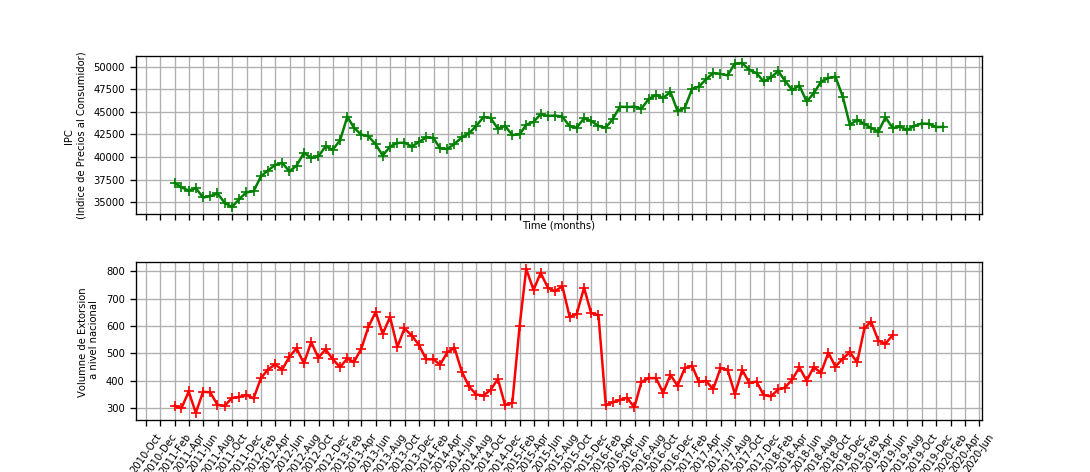

<IPython.core.display.Javascript object>


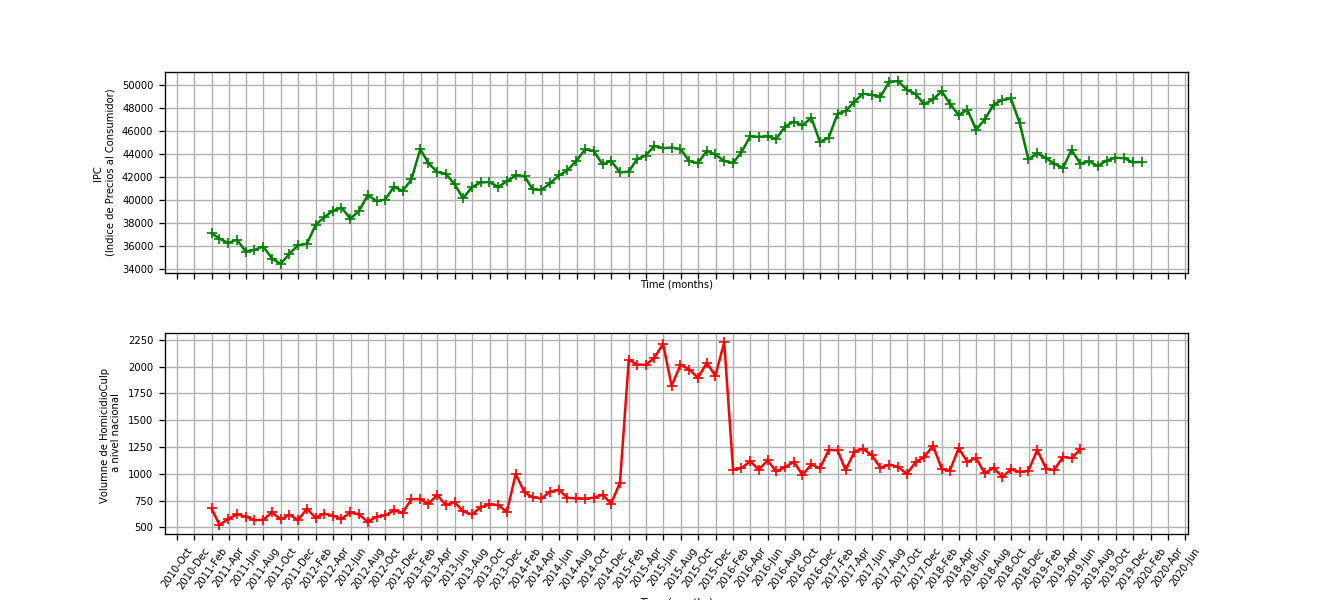

<IPython.core.display.Javascript object>


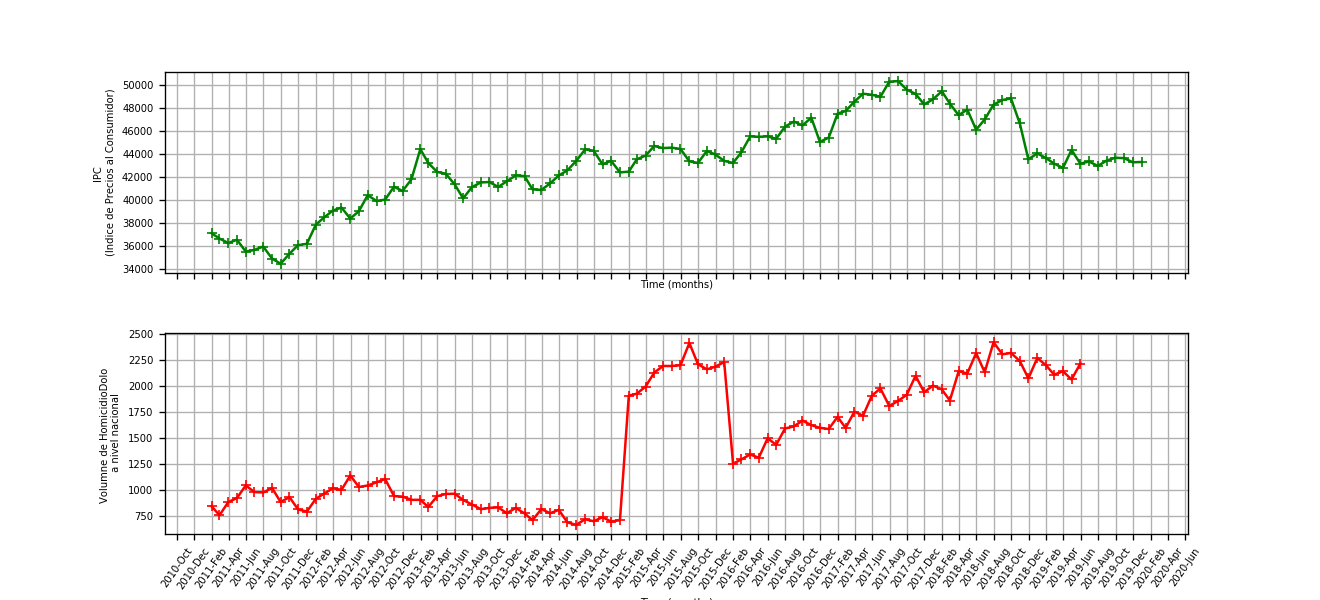

<IPython.core.display.Javascript object>


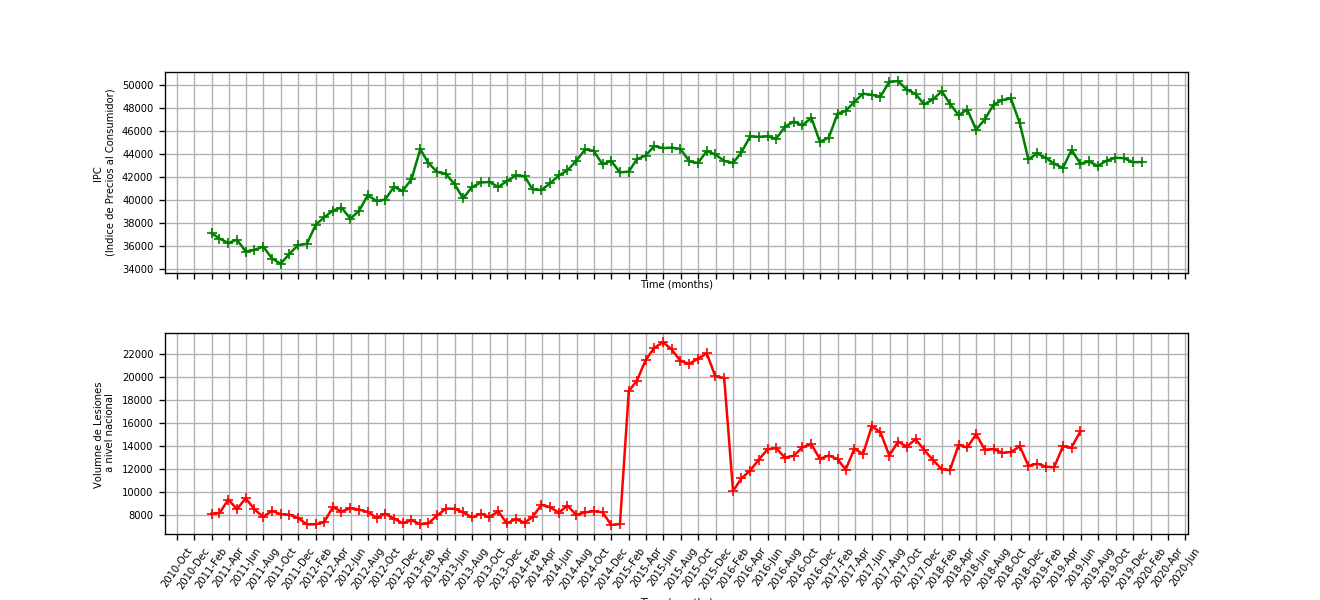

<IPython.core.display.Javascript object>


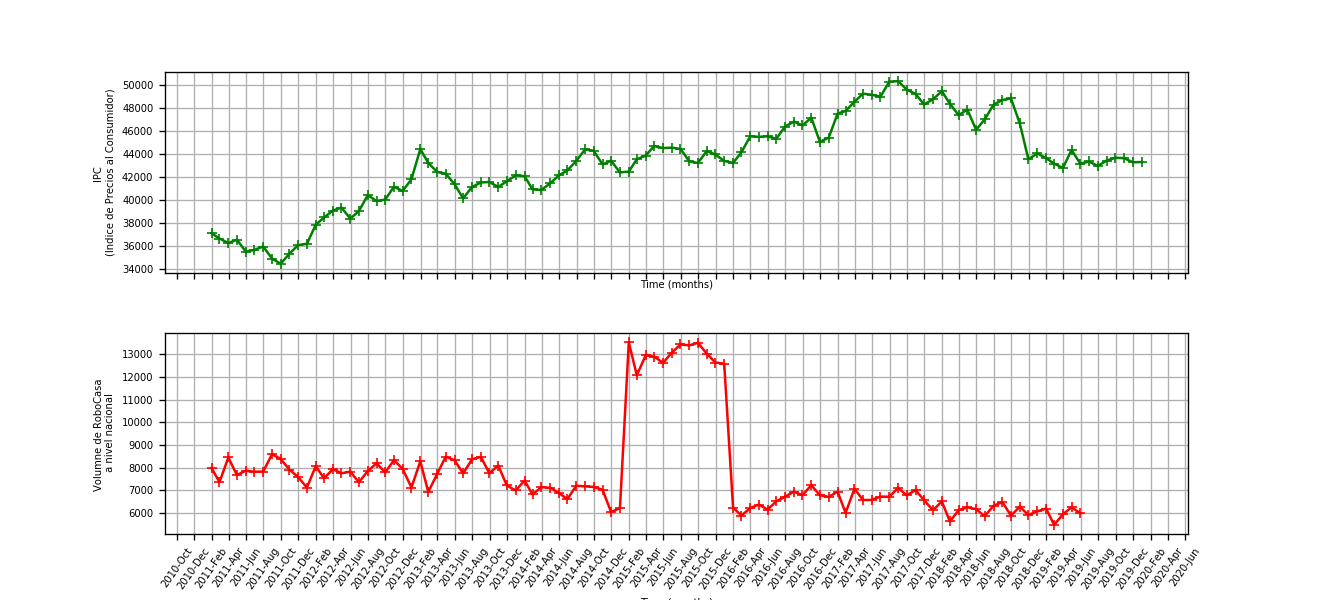

<IPython.core.display.Javascript object>


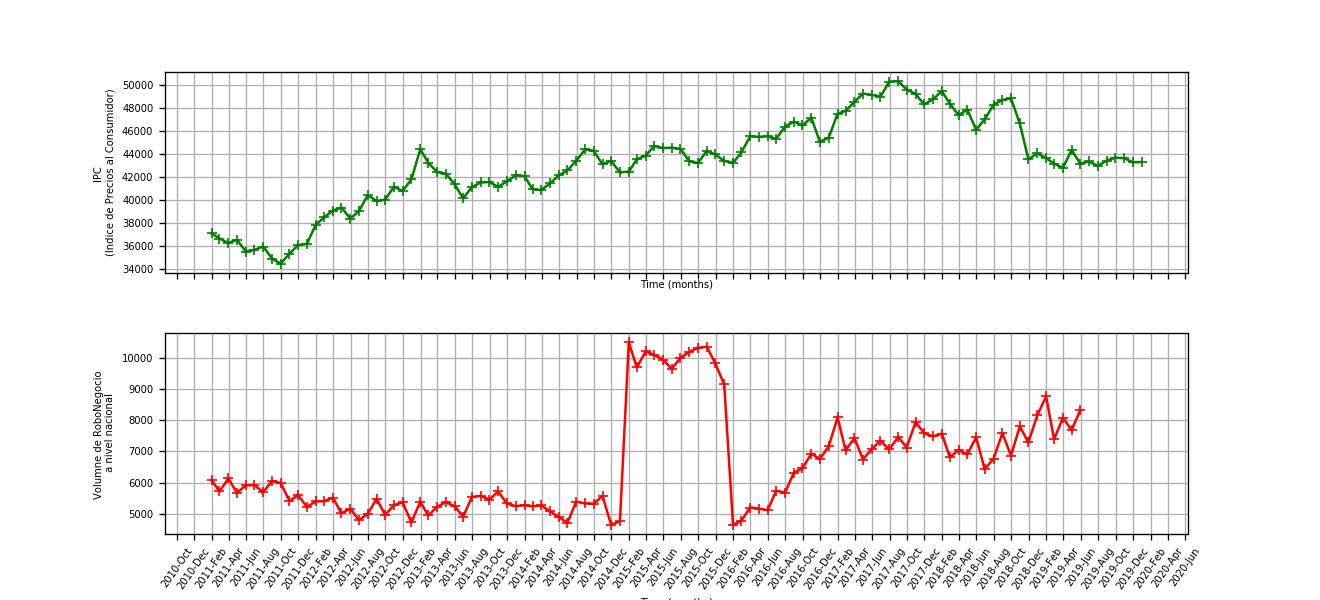

<IPython.core.display.Javascript object>


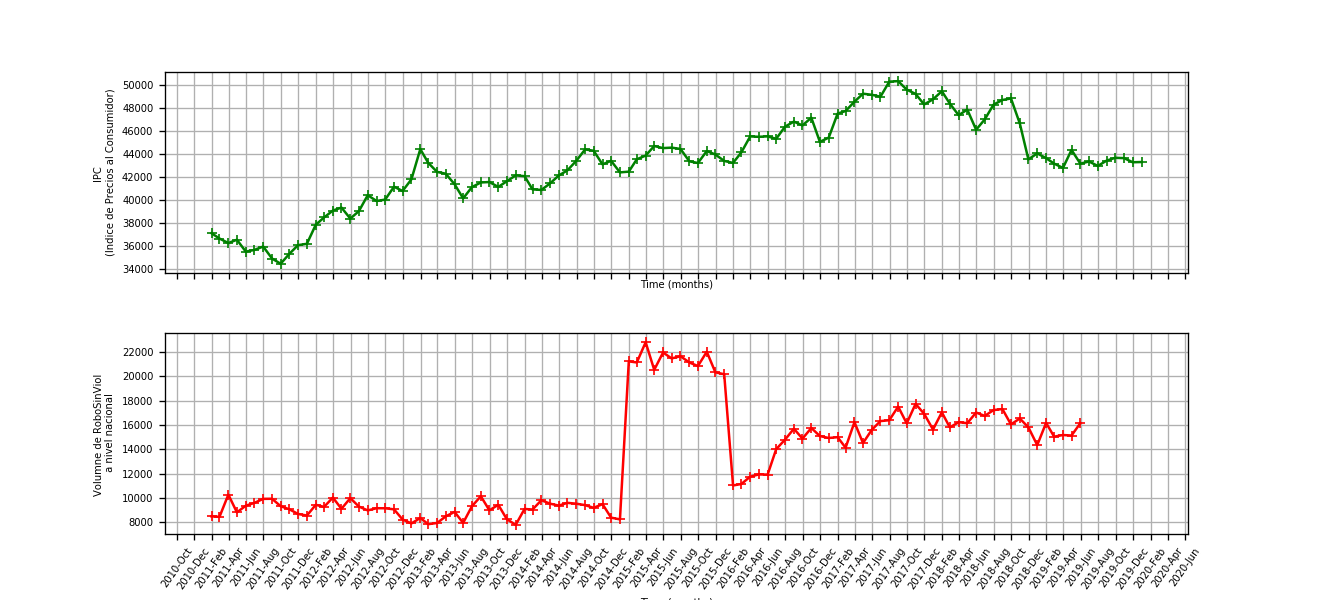

<IPython.core.display.Javascript object>


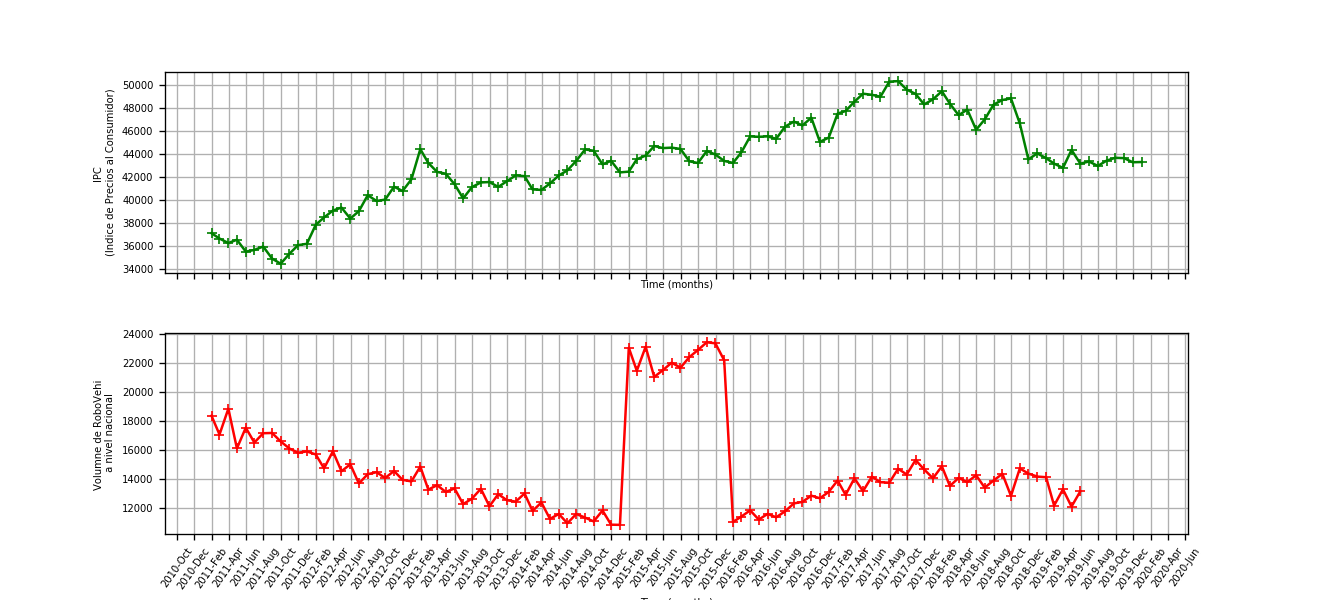

<IPython.core.display.Javascript object>


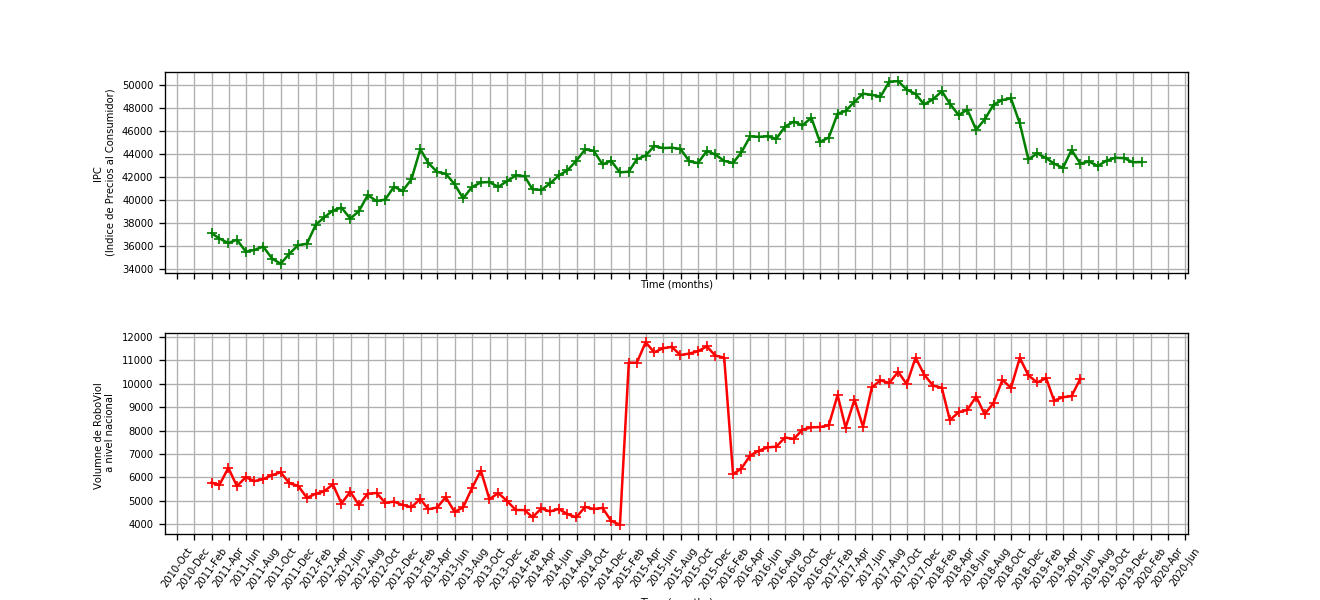

<IPython.core.display.Javascript object>


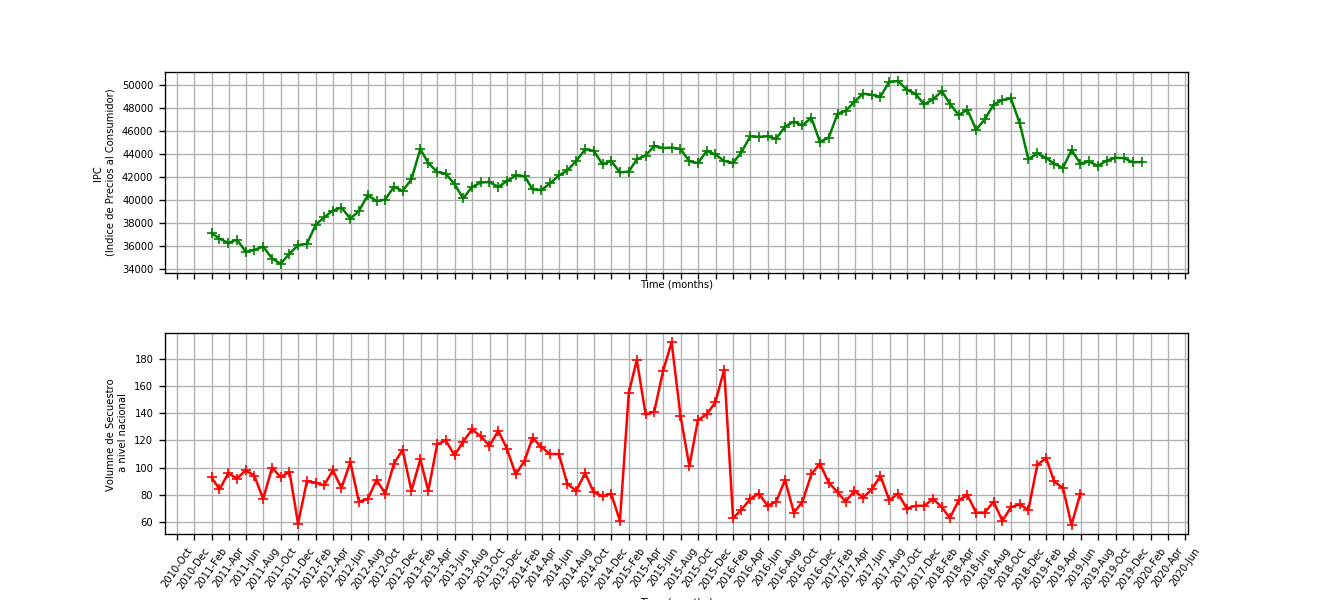

In [326]:
#Funcion para graficar lost tipos de crimenes contra el IPC
def plot_crime(crime_df, ipc_df, crime_name):
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(11,5), sharex=True)
    fig.subplots_adjust(hspace=0.3)
    ax1.title.set_text = f'IPC vs {crime_name}'

    ax1.plot(ipc_df.index, ipc_df["Cierre"],  marker = "+", color ="green", label = "IPC")
    ax1.set_xlabel('Time (months)', fontsize=6)
    ax1.set_ylabel('IPC \n(Indice de Precios al Consumidor)', fontsize=6)
    ax1.grid(True)
    for tick in ax2.get_xticklabels():
        tick.set_rotation(55)
        tick.set_fontsize(5) 

    ax1.tick_params(axis='both', which='major', labelsize=6)
    ax2.tick_params(axis='both', which='major', labelsize=6)

    ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=2))  
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))

    ax2.plot(crime_df.index, crime_df[crime_name],  marker = "+", color ="red", label = crime_name)
    ax2.set_xlabel('Time (months)',fontsize=6)
    ax2.set_ylabel(f'Volumne de {crime_name} \n a nivel nacional' ,fontsize=6)
    ax2.grid(True)
    plt.show()
    plt.savefig(f'{crime_name}.png')
    
#Estandarizando valores entre dataframes para poder graficar juntos en un mismo periodo
#obtener la fecha mas alta entre los minimos de fecha de ambos DFs para establecer el minimo del eje x
if IPC_Monthly.index.min() > crime_df.index.min():
    xmin = IPC_Monthly.index.min()
else:
    xmin = crime_df.index.min()

#obtener la fecha mas baja entre los maximos de fecha de ambos DFs para establecer el maximo del eje x
if IPC_Monthly.index.max() < crime_df.index.max():
    xmax = IPC_Monthly.index.max()
else:
    xmax = crime_df.index.max()

IPC_df_reduced = IPC_Monthly[IPC_Monthly.index >= xmin]

#IPC_df_reduced.head()
crime_df_reduced = crime_df[crime_df.index >= xmin]

#Llamamos la funcion para graficar por cada crimen en el dataframe crime_df_reduced

for crimen in crime_df_reduced.columns:
    if crimen != "Fecha" and crimen != "Poblacion":
        plot_crime(crime_df_reduced, IPC_df_reduced, crimen)

<IPython.core.display.Javascript object>


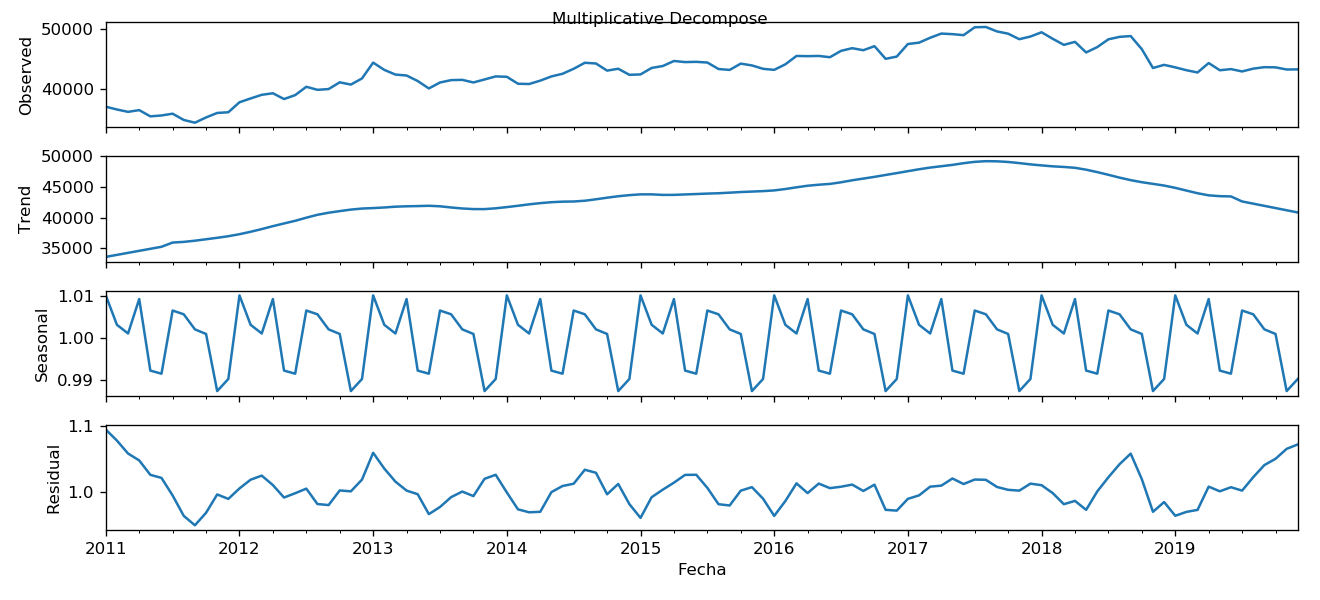

<IPython.core.display.Javascript object>


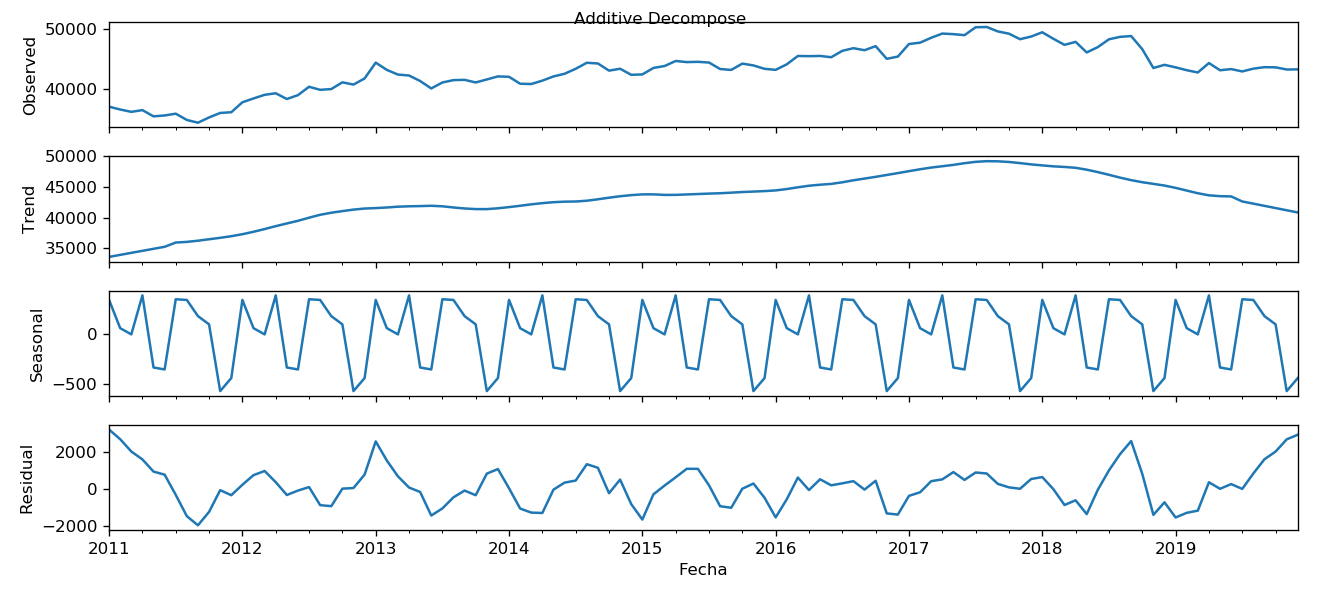

In [297]:
result_mul = seasonal_decompose(IPC_df_reduced['Cierre'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(IPC_df_reduced['Cierre'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (11,5)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=10)
result_add.plot().suptitle('Additive Decompose', fontsize=10)
plt.show()

<IPython.core.display.Javascript object>


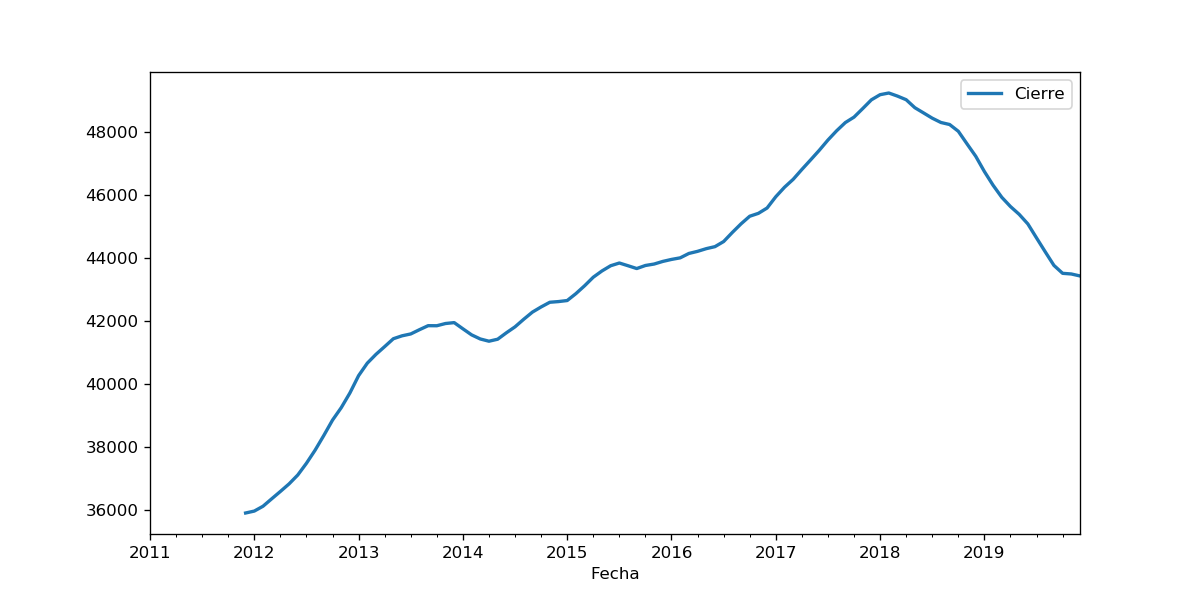

In [277]:
IPC_df_reduced.rolling(12).mean().plot(figsize=(10,5), linewidth=2, fontsize=10)